In [2]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import normalized_mutual_info_score,silhouette_score
import pandas as pd
import numpy as np

In [3]:
# data source: https://www.kaggle.com/datasets/insiyeah/musicfeatures   
original_data = pd.read_csv('data.csv')
original_data2 = pd.read_csv('data_2genre.csv')
original_data.tail()

,filename,tempo,beats,chroma_stft,rmse,spectral_centroid,spectral_bandwidth,rolloff,zero_crossing_rate,mfcc1,...,mfcc12,mfcc13,mfcc14,mfcc15,mfcc16,mfcc17,mfcc18,mfcc19,mfcc20,label
995,rock.00017.au,123.046875,59,0.418812,0.166056,2312.030070,2060.825761,4528.197619,0.140588,-41.402023,...,11.303100,-14.155566,2.824157,-9.477822,3.331261,-8.200088,3.693091,-3.673562,-0.163201,rock
996,rock.00081.au,117.453835,56,0.335774,0.093676,2553.856706,2219.090892,5123.752351,0.136173,-121.410791,...,9.149520,-10.112054,4.211237,-9.349345,1.609701,-10.553566,1.066489,-1.654875,7.544224,rock
997,rock.00004.au,103.359375,45,0.372834,0.208743,1345.850763,1841.748033,2939.265560,0.041099,-127.946876,...,11.043714,-8.385375,2.111019,-6.338260,0.997383,-5.325869,-0.842192,-4.665996,-4.787677,rock
998,rock.00006.au,112.347147,45,0.344472,0.180163,1675.475369,1653.422860,3253.563659,0.087294,-98.356322,...,2.945863,-12.509212,0.091337,-0.774780,-5.700102,-8.630916,-1.903803,-2.196753,-3.395148,rock
999,rock.00066.au,75.999540,36,0.360098,0.042995,2209.357588,2175.214294,4575.588999,0.107147,-245.160921,...,0.813777,-13.018359,0.053168,-8.232851,1.059255,-8.031864,-0.397097,-4.349921,-4.220998,rock


In [4]:
original_data2.tail()

,filename,tempo,beats,chroma_stft,rmse,spectral_centroid,spectral_bandwidth,rolloff,zero_crossing_rate,mfcc1,...,mfcc12,mfcc13,mfcc14,mfcc15,mfcc16,mfcc17,mfcc18,mfcc19,mfcc20,label
195,classical.00020.au,143.554688,69,0.269065,0.038438,1218.290508,1353.616224,2295.177788,0.069813,-300.937697,...,-1.808325,-4.104602,-2.045668,-1.596437,0.646648,1.454414,-0.221094,-1.292084,-7.100527,2
196,classical.00072.au,117.453835,57,0.279421,0.020732,1284.921775,1659.622614,2476.568358,0.063750,-360.821769,...,4.684600,3.343187,-2.251255,-1.852868,2.215029,1.784788,-1.519674,-3.253521,3.998950,2
197,classical.00061.au,151.999081,76,0.281670,0.048189,1322.026416,1590.233329,2473.626709,0.076126,-274.426858,...,-4.592368,-1.540610,-3.028737,-4.697145,-7.715005,-7.212517,-5.410751,-5.246985,-5.270150,2
198,classical.00008.au,135.999178,67,0.254774,0.034038,1516.626219,1629.500705,2973.782018,0.078788,-292.128300,...,4.709107,0.377206,1.464333,3.393674,6.076538,0.963429,-0.753660,-2.105312,0.755132,2
199,classical.00084.au,112.347147,25,0.245491,0.021982,1001.400439,1151.028078,1731.722862,0.057948,-369.184224,...,-9.797995,-5.051084,-5.084386,-3.038442,-1.718458,-1.849090,-2.257478,-1.273307,-0.441167,2


In [22]:
performance = {
    'KMeans': {
        '10way':{
            'silhouette': 0.40,
            'nmi': 0.191
        },
        '2way':{
            'silhouette': 0.731,
            'nmi': 0.721,
        }
        
    },
    'AgglomerativeClustering': {
        '10way':{
            'silhouette': 0.391,
            'nmi': 0.197
        },
        '2way':{
            'silhouette': 0.671,
            'nmi': 0.796,
        }
        
    },
    'DBSCAN': {
        '10way':{
            'silhouette': 0.881,
            'nmi': 0.0,
        },
        '2way':{
            'silhouette': 0.94,
            'nmi': 0.0,
        }
        }
        
    }

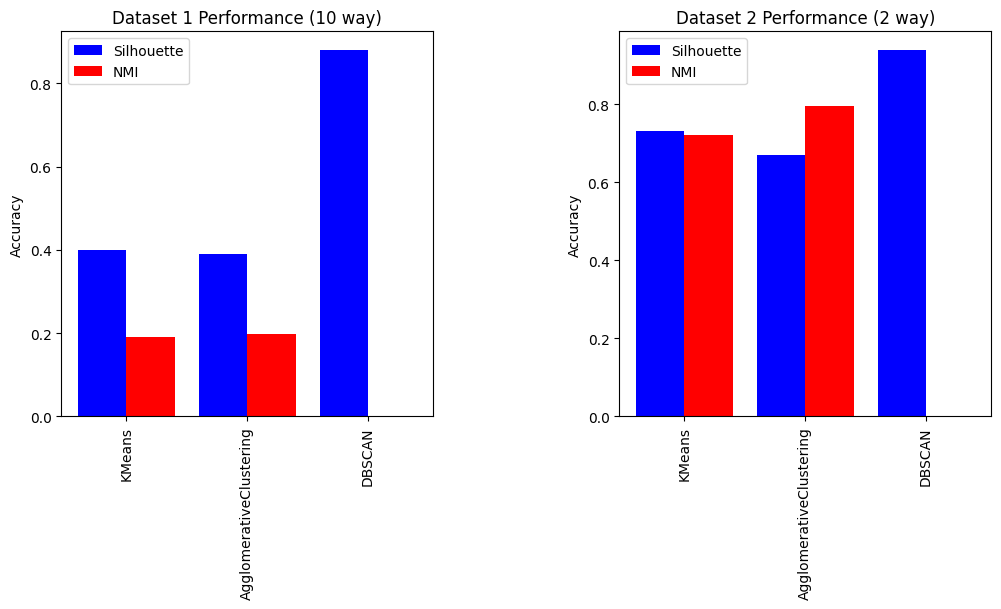

In [23]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
# Unpack the performance data into separate lists for each dataset
dataset_clusters = list(performance.keys())
dataset1_silhouette = [performance[model]['10way']['silhouette'] for model in dataset_clusters]
dataset1_nmi = [performance[model]['10way']['nmi'] for model in dataset_clusters]
dataset2_silhouette = [performance[model]['2way']['silhouette'] for model in dataset_clusters]
dataset2_nmi = [performance[model]['2way']['nmi'] for model in dataset_clusters]

# Create the figure and subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# Plot the first dataset
x = np.arange(len(dataset_clusters))
ax1.bar(x - 0.2, dataset1_silhouette, width=0.4, color='b', label='Silhouette')
ax1.bar(x + 0.2, dataset1_nmi, width=0.4, color='r', label='NMI')
ax1.set_xticks(x)
ax1.set_xticklabels(dataset_clusters, rotation=90)
ax1.set_title('Dataset 1 Performance (10 way)')
ax1.set_ylabel('Accuracy')
ax1.legend()

# Plot the second dataset
ax2.bar(x - 0.2, dataset2_silhouette, width=0.4, color='b', label='Silhouette')
ax2.bar(x + 0.2, dataset2_nmi, width=0.4, color='r', label='NMI')
ax2.set_xticks(x)
ax2.set_xticklabels(dataset_clusters, rotation=90)
ax2.set_title('Dataset 2 Performance (2 way)')
ax2.set_ylabel('Accuracy')
ax2.legend()

# Adjust the spacing between subplots
plt.subplots_adjust(wspace=0.5)

# Display the plot
plt.show()

In [6]:
X_train, y_train = (original_data.drop('label', axis=1),  # Replace 'target_column' with your actual label column name
    original_data['label'])  # Your target/label column
    
X2_train, y2_train = (original_data2.drop('label', axis=1),  # Replace 'target_column' with your actual label column name
    original_data2['label'])  # Your target/label column
    

In [14]:
i = 2
select_column = ['tempo','beats','chroma_stft','rmse','spectral_centroid','spectral_bandwidth','rolloff','zero_crossing_rate']
mfcc = ['mfcc1','mfcc2','mfcc3','mfcc4','mfcc5','mfcc6','mfcc7','mfcc8','mfcc9','mfcc10','mfcc11','mfcc12','mfcc13','mfcc14','mfcc15','mfcc16','mfcc17','mfcc18','mfcc19','mfcc20']
if i == 1:
    x = X_train[select_column]
    train_y = y_train
else:   
    x = X2_train[select_column]
    train_y = y2_train

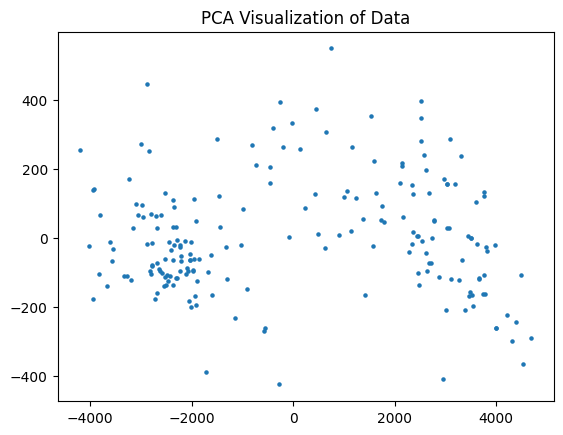

In [103]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

pca = PCA(n_components=3)
X_pca = pca.fit_transform(x)
plt.scatter(X_pca[:, 0], X_pca[:, 1], s=5)
plt.title("PCA Visualization of Data")
plt.show()

In [16]:
from sklearn.cluster import DBSCAN
dbscan= DBSCAN(eps=104, min_samples=17).fit(x)
labels = dbscan.labels_
print(f"Normalized Mutual Information: {normalized_mutual_info_score(train_y, labels)}")

Normalized Mutual Information: 0.0


In [44]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=10, random_state=42,n_init=2).fit(x)
print(f"silhouette score: {silhouette_score(x, kmeans.labels_)}")
print(f"Normalized Mutual Information: {normalized_mutual_info_score(train_y, kmeans.labels_)}")

silhouette score: 0.4006426023731021
Normalized Mutual Information: 0.19145731185534204


In [59]:
from sklearn.cluster import AgglomerativeClustering
agglo = AgglomerativeClustering(n_clusters=2,linkage='average').fit(x)
print(f"silhouette score: {silhouette_score(x, agglo.labels_)}")
print(f"Normalized Mutual Information: {normalized_mutual_info_score(train_y, agglo.labels_)}")

silhouette score: 0.6710152103556309
Normalized Mutual Information: 0.796128522054909
